<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Выполнение проекта давалось не очень легко, ниже очень очень печальная картина. Думаю, после комментариев ревьювера и корректировки проекта картина будет более ясной. Заранее извиняюсь перед проверяющим, прошу понять и простить, так как у меня нет опыта ни в аналитике, ни в python) Старалась изо всех сил)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import pandas as pd
os.chdir("C:/Users/Admin/Downloads/ЯНДЕКС/Проекты из курса")
data = pd.read_csv('real_estate_data.csv', sep='\t')

#pd.set_option('display.max_columns', None)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
#data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

## Предобработка данных

Рассмотрим пропущенные значения:

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенных значений довольно много. Из них нам понадобятся такие как ceiling_height, living_area, kitchen_area, cityCenters_nearest

Отсутствующие значения в столце 'living_area' заменяем на медианное значение площади, исходя из количества комнат.

In [4]:
living_area_median = data.groupby('rooms')['living_area'].median()
# для количества комнат из серии, составленной выше
for rooms in living_area_median.index: 
# в нашем датафрейме мы выбираем только те строки, где количество комнат соответствует количеству комнат выше (по очереди),
    data.loc[data['rooms'] == rooms,'living_area'] =  data.loc[data['rooms'] == rooms,'living_area'].fillna(living_area_median.loc[rooms]) 
# и приравниваем их к самим себе (сохраняем), только заполняя пропуски площадью из столбца с жилой площадью

Отсутствующие значения в столце 'kitchen_area' заменяем на медианное значение площади, исходя из количества комнат. И далее заполняем по такому же принципу

In [5]:
kitchen_area_median = data.groupby('rooms')['kitchen_area'].median()
for rooms in kitchen_area_median.index: 
    data.loc[data['rooms'] == rooms,'kitchen_area'] =  data.loc[data['rooms'] == rooms,'kitchen_area'].fillna(kitchen_area_median.loc[rooms]) 

In [6]:
days_exposition_median = data.groupby('rooms')['days_exposition'].median()
for rooms in days_exposition_median.index: 
    data.loc[data['rooms'] == rooms,'days_exposition'] =  data.loc[data['rooms'] == rooms,'days_exposition'].fillna(days_exposition_median.loc[rooms]) 

In [7]:
ceiling_height_median = data.groupby('rooms')['ceiling_height'].median()
for rooms in ceiling_height_median.index: 
    data.loc[data['rooms'] == rooms,'ceiling_height'] =  data.loc[data['rooms'] == rooms,'ceiling_height'].fillna(ceiling_height_median.loc[rooms]) 

In [8]:
cityCenters_nearest_median = data.groupby('rooms')['cityCenters_nearest'].median()
for rooms in cityCenters_nearest_median.index: 
    data.loc[data['rooms'] == rooms,'cityCenters_nearest'] =  data.loc[data['rooms'] == rooms,'cityCenters_nearest'].fillna(cityCenters_nearest_median.loc[rooms]) 

Проверяю работу функций выше:

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest         0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition             0
dtype: int64

Заменяю типы данных:

In [10]:
columns = ['total_area', 'living_area', 'last_price', 'days_exposition', 'kitchen_area', 'ceiling_height']
for i in columns:
    data[i] = data[i].fillna(0)
    data[i] = data[i].astype('int')

## Расчёты и добавление результатов в таблицу

Добавление цены квадратного метра:

In [11]:
data['sq_price']=data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price
0,20,13000000,108,2019-03-07T00:00:00,3,2,16.0,51,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370.370370
1,7,3350000,40,2018-12-04T00:00:00,1,2,11.0,18,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,83750.000000
2,10,5196000,56,2015-08-20T00:00:00,2,2,5.0,34,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159,2015-07-24T00:00:00,3,2,14.0,45,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100,2018-06-19T00:00:00,2,3,14.0,32,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000


Отразим корректно день недели, месяц и год публикации объявления при помощи to_datetime:

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price
0,20,13000000,108,2019-03-07,3,2,16.0,51,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370.370370
1,7,3350000,40,2018-12-04,1,2,11.0,18,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,83750.000000
2,10,5196000,56,2015-08-20,2,2,5.0,34,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286
3,0,64900000,159,2015-07-24,3,2,14.0,45,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629
4,2,10000000,100,2018-06-19,2,3,14.0,32,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000


 Добавим этаж квартиры; варианты — первый, последний, другой, нет данных:

In [13]:
def get_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] != 1 and row['floor'] != row['floors_total']:
        return 'другой'
    return 'нет данных'

data['floor_name'] = data.apply(get_floor, axis = 1)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_name
0,20,13000000,108,2019-03-07,3,2,16.0,51,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,114,120370.370370,другой
1,7,3350000,40,2018-12-04,1,2,11.0,18,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,83750.000000,первый
2,10,5196000,56,2015-08-20,2,2,5.0,34,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,другой
3,0,64900000,159,2015-07-24,3,2,14.0,45,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,другой
4,2,10000000,100,2018-06-19,2,3,14.0,32,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,другой


Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [14]:
data['living_to_total_sq']=data['living_area']/data['total_area']
data['kitchen_to_total_sq']=data['kitchen_area']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_name,living_to_total_sq,kitchen_to_total_sq
0,20,13000000,108,2019-03-07,3,2,16.0,51,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,114,120370.370370,другой,0.472222,0.231481
1,7,3350000,40,2018-12-04,1,2,11.0,18,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81,83750.000000,первый,0.450000,0.275000
2,10,5196000,56,2015-08-20,2,2,5.0,34,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558,92785.714286,другой,0.607143,0.142857
3,0,64900000,159,2015-07-24,3,2,14.0,45,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424,408176.100629,другой,0.283019,0.056604
4,2,10000000,100,2018-06-19,2,3,14.0,32,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121,100000.000000,другой,0.320000,0.410000


## Исследовательский анализ данных

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  int32         
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  int32         
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  int32         
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  int32         
 13  balcony         

Изучение параметра "площадь":

In [16]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

Разброс нормальных значений (25%-75%) площади от 40 до 69кв.м. Медианная площадь - 60,1кв.м. Средний разброс - 35,66. Значения менее 20кв.м. и более 200кв.м. отнесу к выбросам и редким значениям

<AxesSubplot:>

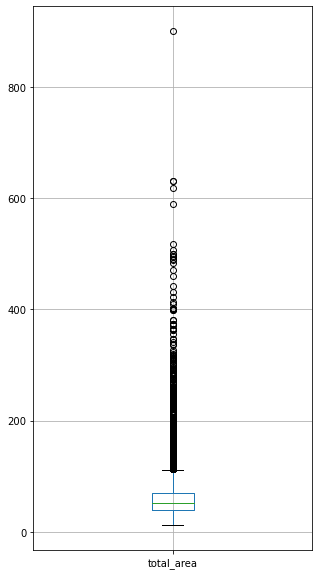

In [17]:
data.boxplot(column='total_area', figsize=(5,10))

Text(0.5, 1.0, 'Площадь м2')

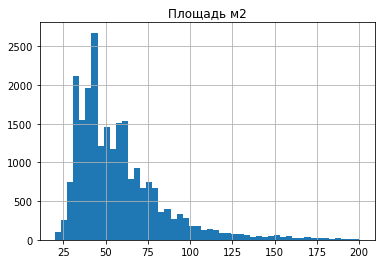

In [18]:
data['total_area'].hist(bins=50, range=(20,200))
plt.title("Площадь м2")

Изучение параметра "цена":

In [19]:
data['last_price'] = data['last_price']/1000000
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

Медианная цена 6,54млн.р, нормальные значения от 3,4 до 6,8млн.р. Большой показатель среднего отклонения. В данных много выбросов, что можно увидеть на диаграмме размаха:

Text(0.5, 1.0, 'Цена млн.р')

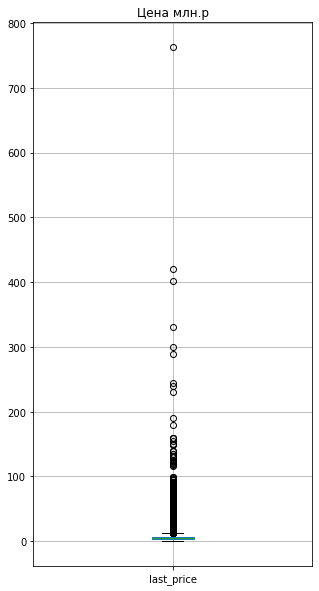

In [20]:
data.boxplot(column='last_price', figsize=(5,10))
plt.title("Цена млн.р")

Откинем выбросы от 40млн.р и построим гистограмму:

In [21]:
data['last_price']

0        13.000
1         3.350
2         5.196
3        64.900
4        10.000
          ...  
23694     9.700
23695     3.100
23696     2.500
23697    11.475
23698     1.350
Name: last_price, Length: 23699, dtype: float64

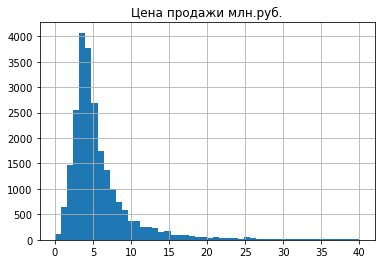

In [22]:
plt.title('Цена продажи млн.руб.')
data['last_price'].hist(bins=50, range=(0,40))
plt.show()

Изучение параметра "число комнат":

In [23]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

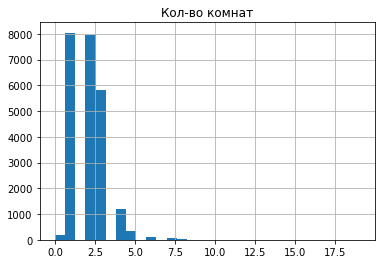

In [24]:
plt.title('Кол-во комнат')
data['rooms'].hist(bins=30)
plt.show()

Изучение параметра "высота потолка":

In [25]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.148656
std          1.035599
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолка - 2,1 метр, что мало, максимальное количество - 100м, что тоже крайне нереалистично. Скорее всего в данных большое количество выбросов.

<AxesSubplot:>

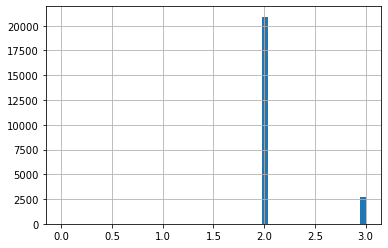

In [26]:
data['ceiling_height'].hist(bins=50, range=(0, 3))

**Переходим к пункту: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"**

In [27]:
data['days_exposition'].describe()

count    23699.000000
mean       170.664374
std        206.420723
min          1.000000
25%         45.000000
50%         92.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее значение 170 дней, медиана - 92 дня. Обычно продажа занимает около 92 дней. Значения до Q2, т.е. менее 45 дней - за пределами нормальных значений, можно характеризовать как очень быструю продажу. За необычно долгий период можно взять за основу числа, которые уходят за 75%, т.е. более 200 дней.

<AxesSubplot:>

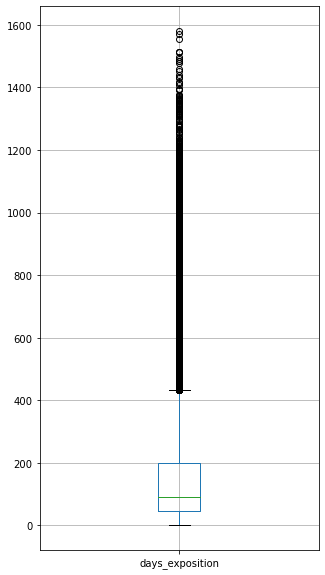

In [28]:
data.boxplot(column='days_exposition', figsize=(5,10))

<AxesSubplot:>

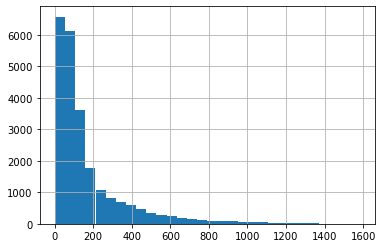

In [29]:
data['days_exposition'].hist(bins=30)

Значения менее второй квадрильи (45 дней), можно считать вбросами. Отсортировываем таблицу при помощи метода query. Значения после 1200 дней стремятся к нулю, их также убираем, как редкие значения.

**Задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."**

<AxesSubplot:>

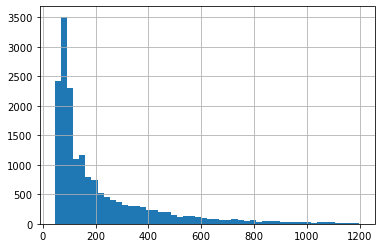

In [30]:
data=data.query('45 < days_exposition < 1200')
data['days_exposition'].hist(bins=50)

In [31]:
len(data)# проверяем количество после фильтрации

17633

**Задание "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'. "**

In [32]:
data['number'] = data.reset_index().index #добавление столбца с нумерацией списка, для удобства

**Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.**  - Для выполнения данного пункта построим матрицу:

                     cityCenters_nearest  last_price     rooms  total_area
cityCenters_nearest             1.000000   -0.216632 -0.200211   -0.239153
last_price                     -0.216632    1.000000  0.390085    0.709365
rooms                          -0.200211    0.390085  1.000000    0.758644
total_area                     -0.239153    0.709365  0.758644    1.000000


array([[<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='total_area'>,
        <AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
     

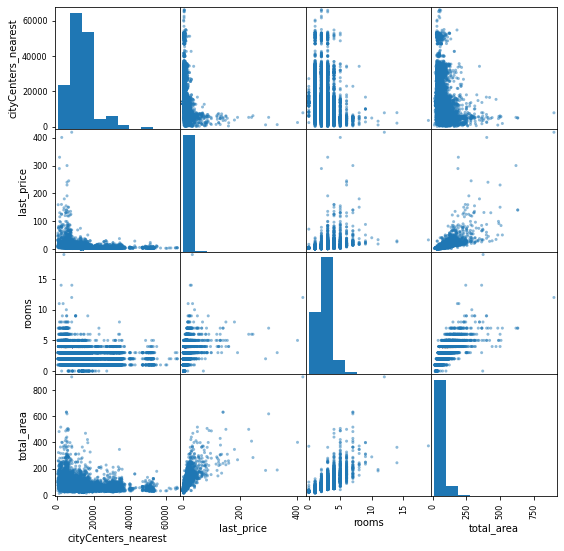

In [33]:
data_stat_multi = data.pivot_table(index='number', values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'])
print(data_stat_multi.corr())
pd.plotting.scatter_matrix(data_stat_multi, figsize=(9, 9)) 

Самая сильная корреляция наблюдается между ценой и общей площадью, далее влияет фактор количества комнат, однако актуально наличие до 5 комнат, далее цена начинает снижаться.
Обратная корреляция между стоимостью квартир и расстоянием от центра наблюдается, но не оч сильная, так как взаимосвязь сильная на близких к центру расстояниях, но после расстояния в 10000 влияние снижается и данный фактор уже не имеет большого значения.

**Также изучите зависимость от даты размещения: дня недели, месяца и года.**

Попробовала два способа, но кроме падения цен в 2018г, никаких закономерностей не заметила

<AxesSubplot:xlabel='floor_name'>

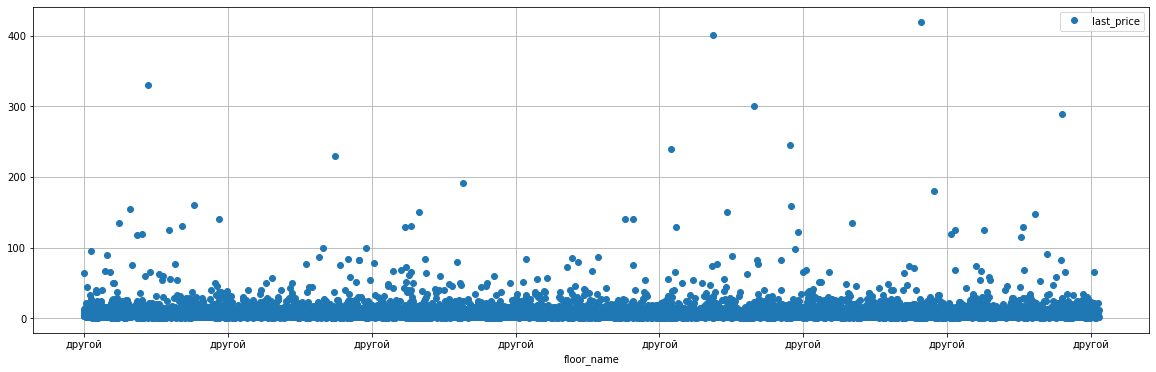

In [34]:
data.plot(
    x='floor_name',
    y='last_price',
    style='o',
    grid=True,
    figsize=(20, 6),
) 

In [35]:
most_popular = data.pivot_table(index='locality_name', values = 'sq_price', aggfunc=('mean','count'))
most_popular.columns = ('add_count','sq_price_agg')
#most_popular = data['locality_name'].value_counts().head(10)
most_popular.sort_values(by='add_count', ascending=False)

,add_count,sq_price_agg
locality_name,,
Санкт-Петербург,11787,117003.247013
посёлок Мурино,338,85257.753270
посёлок Шушары,320,79768.796004
Всеволожск,307,67936.411280
Пушкин,295,103928.790682
...,...,...
посёлок Высокоключевой,1,34931.506849
поселок Возрождение,1,29054.054054
поселок Гаврилово,1,27209.302326


10 населённых пунктов с наибольшим числом объявлений:

In [36]:
most_popular.sort_values(by='add_count', ascending=False).head(10)

,add_count,sq_price_agg
locality_name,,
Санкт-Петербург,11787,117003.247013
посёлок Мурино,338,85257.753270
посёлок Шушары,320,79768.796004
Всеволожск,307,67936.411280
Пушкин,295,103928.790682
Гатчина,238,68094.159981
Колпино,229,75880.975360
посёлок Парголово,226,91167.885675
деревня Кудрово,202,92265.110153


Населённые пункты с самой высокой стоимостью жилья:

In [37]:
most_popular.sort_values(by='sq_price_agg', ascending=False).head(10)

,add_count,sq_price_agg
locality_name,,
посёлок Лисий Нос,1,169883.720930
Зеленогорск,19,119118.906148
Санкт-Петербург,11787,117003.247013
деревня Бор,1,105704.166667
посёлок Репино,4,104313.941396
Пушкин,295,103928.790682
Сестрорецк,146,102458.328096
Кудрово,123,100164.192373
деревня Мистолово,10,100144.675611


Населённые пункты с самой низкой стоимостью жилья:

In [38]:
most_popular.sort_values(by='sq_price_agg', ascending=False).tail(10)

,add_count,sq_price_agg
locality_name,,
поселок Житково,2,15032.790592
поселок станции Лужайка,1,15000.000000
посёлок станции Свирь,1,15000.000000
деревня Сижно,1,13709.677419
поселок Тёсово-4,1,12931.034483
поселок Совхозный,1,12555.555556
деревня Ям-Тесово,1,12500.000000
деревня Выскатка,1,11463.414634
городской посёлок Будогощь,1,10714.285714


 **Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.**

In [39]:
data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000 #конвертируем в километры
#data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')#округление
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round() #округление
data.head() #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_name,living_to_total_sq,kitchen_to_total_sq,number,cityCenters_nearest_km
0,20,13.000,108,2019-03-07,3,2,16.0,51,8,NaN,...,482.0,2.0,755.0,114,120370.370370,другой,0.472222,0.231481,0,16.0
1,7,3.350,40,2018-12-04,1,2,11.0,18,1,NaN,...,NaN,0.0,NaN,81,83750.000000,первый,0.450000,0.275000,1,19.0
2,10,5.196,56,2015-08-20,2,2,5.0,34,4,NaN,...,90.0,2.0,574.0,558,92785.714286,другой,0.607143,0.142857,2,14.0
3,0,64.900,159,2015-07-24,3,2,14.0,45,9,NaN,...,84.0,3.0,234.0,424,408176.100629,другой,0.283019,0.056604,3,7.0
4,2,10.000,100,2018-06-19,2,3,14.0,32,13,NaN,...,112.0,1.0,48.0,121,100000.000000,другой,0.320000,0.410000,4,8.0


**Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "**

In [40]:
st_peter_data = data.query('locality_name == "Санкт-Петербург"')
st_peter_data_agg = st_peter_data.pivot_table(index='cityCenters_nearest_km', values = 'sq_price', aggfunc='mean')
st_peter_data_agg.rename(columns={'sq_price':'st_peter_sq_price_agg'}, inplace=True)
#most_popular = data['locality_name'].value_counts().head(10)
#st_peter_data_agg.sort_values(by='add_count', ascending=False)
st_peter_data_agg

,st_peter_sq_price_agg
cityCenters_nearest_km,
0.0,236866.346730
1.0,177670.820650
2.0,157821.632774
3.0,123357.861719
4.0,132402.851705
5.0,143031.102741
6.0,152047.698382
7.0,162716.193726
8.0,128475.763572


<AxesSubplot:xlabel='cityCenters_nearest_km'>

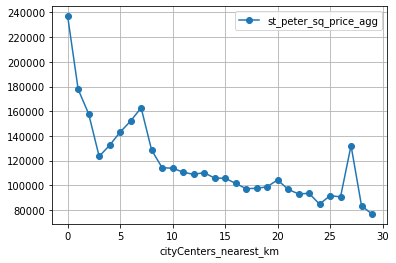

In [41]:
st_peter_data_agg.plot(style='o-', grid=True)

Резкое падение цены приблизительно до 3,5км, затем опять рост до 6км, и снова падение, с переходом на стабильное убывание цены (есть некоторые выбросы после 25км). Скорее всего, у меня ошибка в данных, и поэтому график такой странный((( Ошибку не нашла, условно определила радиус центра - 3км

**"Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.**

In [42]:
flats_center= st_peter_data.query('cityCenters_nearest_km < 3')

In [43]:
flats_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 436 entries, 24 to 23648
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            436 non-null    int64         
 1   last_price              436 non-null    float64       
 2   total_area              436 non-null    int32         
 3   first_day_exposition    436 non-null    datetime64[ns]
 4   rooms                   436 non-null    int64         
 5   ceiling_height          436 non-null    int32         
 6   floors_total            436 non-null    float64       
 7   living_area             436 non-null    int32         
 8   floor                   436 non-null    int64         
 9   is_apartment            57 non-null     object        
 10  studio                  436 non-null    bool          
 11  open_plan               436 non-null    bool          
 12  kitchen_area            436 non-null    int32  

In [44]:
flats_center['total_area'].describe()

count    436.000000
mean     106.974771
std       62.519785
min       12.000000
25%       67.750000
50%       92.000000
75%      124.250000
max      517.000000
Name: total_area, dtype: float64

In [45]:
flats_center['last_price'].describe()

count    436.000000
mean      20.128301
std       34.162812
min        2.400000
25%        8.150000
50%       11.490000
75%       17.000000
max      401.300000
Name: last_price, dtype: float64

In [46]:
flats_center['rooms'].describe()

count    436.000000
mean       3.247706
std        1.526206
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       14.000000
Name: rooms, dtype: float64

In [47]:
flats_center['ceiling_height'].describe()

count    436.000000
mean       2.649083
std        0.557725
min        2.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: ceiling_height, dtype: float64

Среднестатистическая квартира в центре Питера: цена 11,5млн.р, площадь 92кв.м, количество комнат - 3, высота потолка - 3м (мало в это верится)))

**Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"**

                     cityCenters_nearest     floor  last_price     rooms
cityCenters_nearest             1.000000  0.022885   -0.043477 -0.035514
floor                           0.022885  1.000000    0.311755  0.093702
last_price                     -0.043477  0.311755    1.000000  0.194592
rooms                          -0.035514  0.093702    0.194592  1.000000


array([[<AxesSubplot:xlabel='cityCenters_nearest', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='floor', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='cityCenters_nearest'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='floor'>,
        <AxesSubplot:xlabel='floor', ylabel='floor'>,
        <AxesSubplot:xlabel='last_price', ylabel='floor'>,
        <AxesSubplot:xlabel='rooms', ylabel='floor'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>,
        <AxesSubplot:xlabel='floor', ylabel='last_price'>,
        <AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='cityCenters_nearest', ylabel='rooms'>,
        <AxesSubplot:xlabel='floor', ylabel='rooms'>,
        <AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms'

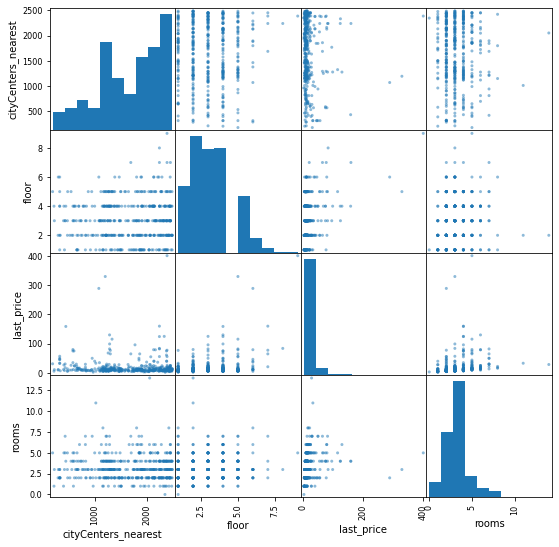

In [48]:
st_peter_stat_multi = flats_center.pivot_table(index='number', values=['last_price', 'cityCenters_nearest', 'rooms', 'floor'])
print(st_peter_stat_multi.corr())
#print(station_stat_multi.head())
pd.plotting.scatter_matrix(st_peter_stat_multi, figsize=(9, 9)) 

Корреляция между параметрами слабая, тем не менее стоимость растет при увеличении кол-ва комнат до 5 комнат (такая же тенденция была в общих данных) и уменьшается при отдалении от центра. Тенденции соппадают с общими.

In [49]:
flats_center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_price,floor_name,living_to_total_sq,kitchen_to_total_sq,number,cityCenters_nearest_km
24,8,6.50,97,2015-10-31,2,2,3.0,46,1,NaN,...,411.0,3.0,124.0,265,67010.309278,первый,0.474227,0.195876,22,2.0
155,8,96.00,317,2017-07-07,4,3,3.0,183,3,NaN,...,508.0,3.0,366.0,62,302839.116719,последний,0.577287,0.034700,126,2.0
207,11,9.00,72,2018-09-08,2,2,5.0,43,4,NaN,...,276.0,3.0,485.0,91,125000.000000,другой,0.597222,0.152778,166,2.0
213,11,8.70,111,2016-10-10,4,3,4.0,73,2,NaN,...,463.0,3.0,55.0,791,78378.378378,другой,0.657658,0.126126,170,1.0
226,17,7.95,86,2019-04-24,4,2,3.0,52,1,NaN,...,NaN,0.0,NaN,156,92441.860465,первый,0.604651,0.139535,181,2.0


Влияние этажа на стоимость квартиры:

<AxesSubplot:xlabel='floor'>

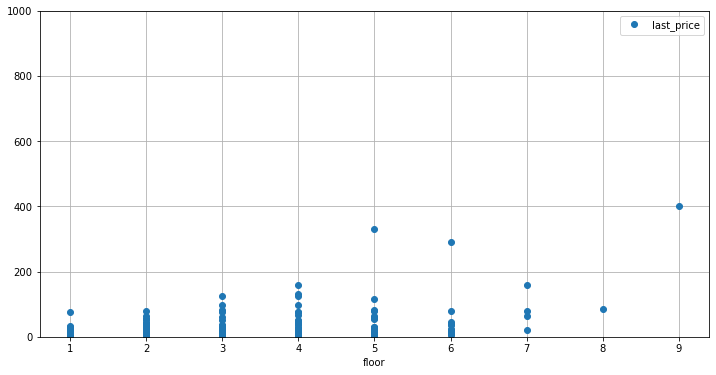

In [50]:
flats_center.plot(x='floor', y='last_price', style ='o', ylim=(0,1000), grid=True, figsize=(12,6))

Можно сделать вывод, что первый этаж дешевле.

Влияние даты размещения объявления на цену:

<AxesSubplot:>

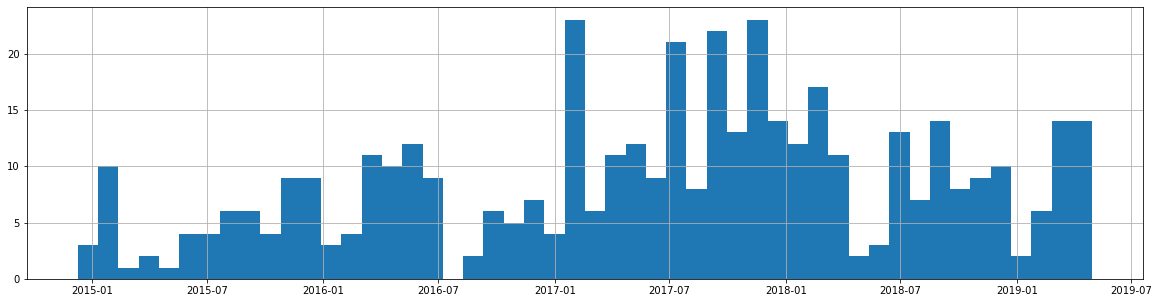

In [51]:
flats_center['first_day_exposition'].hist(bins=50, figsize=(20,5)) 

В целом, vожно лишь отметить, что цена в 2018году снизилась по сравнению с 2017 годом. Самые высокие цены наблюдались в 2017году.